# Шаг 1. Общая информация о данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('bank_clients.csv')

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


# Шаг 2. Предобработка данных

### 2.1.1. Обработка артефактов

Сначала лучше обработать артефакты, а затем заполнять пустые значения. Такой порядок обеспечит наиболее корректные результаты

#### Обнаруженные артефакты и рекомендации по их обработке

`children:`
* <span style="color:red"> **Артефакты:** </span> отрицательные значения и аномально высокое значение 20.
* <span style="color:orange"> **Возможные причины появления:** </span>
  * Отрицательные значения: Могут возникнуть из-за ошибок при вводе данных, например, когда сотрудник случайно вводит «-1» вместо «1» или из-за ошибок при импорте данных из другой системы.
  * Аномально высокие значения (например, 20 детей): Это может быть случайный ввод ошибки или данные из-за сбоя, особенно если такие значения встречаются редко. Также подобные значения могут возникать из-за отсутствия контроля над допустимыми диапазонами при вводе данных.
* <span style="color:green"> **Решение:** </span> Заменить отрицательные значения на 0. Аномальные значения 20 следует заменить на медиану (1) по этому столбцу.
* <span style="color:blue"> **Обоснование:** </span> Значения -1 — это явные ошибки ввода, и их корректировка на 0 устранит их аномальность, не искажая другие данные. Для значения 20 медиана является безопасной заменой, так как она более точно отражает типичное количество детей, снижая вероятность появления неверных выводов в анализе.

`days_employed:`
* <span style="color:red"> **Артефакты:** </span> отрицательные значения (отрицательный стаж) и очень высокие положительные значения (до 401,755 дней ≈ 1,100 лет).
* <span style="color:orange"> **Возможные причины появления:** </span>
  * Отрицательные значения (отрицательный стаж): Это может быть связано с ошибками в программном обеспечении, например, если данные стажа рассчитаны как разность дат (и одна из них введена некорректно). Иногда ошибки происходят при конвертации данных между различными форматами, что также приводит к отрицательным значениям.
  * Чрезмерно высокие значения (например, 401755 дней ≈ 1100 лет): Ошибки в форматах хранения данных, такие как недочеты в системе учёта стажа или неверные единицы измерения (например, если данные были введены в часах, а затем некорректно конвертированы в дни), могут приводить к таким значениям.
* <span style="color:green"> **Решение:** </span> Сделать все значения положительными и установить верхний предел стажа в 50 лет, чтобы исключить завышенные значения. При превышении 50 лет заменить стаж на медианное значение по столбцу.
* <span style="color:blue"> **Обоснование:** </span> Отрицательные значения являются ошибочными, так как стаж не может быть отрицательным. Ограничение 50 годами (18,250 дней) является реалистичным для большинства профессий, и замена чрезмерных значений на медиану устранит влияние выбросов, сохраняя при этом информативность набора данных.

`dob_years:`
* <span style="color:red"> **Артефакты:** </span> значение 0 в возрасте, что не соответствует действительности.
* <span style="color:orange"> **Возможные причины появления:** </span>
Возраст 0: Такое значение часто появляется, если дата рождения не была введена, или данные были ошибочно пропущены. В некоторых базах данных при отсутствии значения может проставляться 0, а не NaN или «неизвестно», что искажает данные.
* <span style="color:green"> **Решение:** </span> Заменить возраст 0 на медианный возраст в наборе данных.
* <span style="color:blue"> **Обоснование:** </span> Медианный возраст — подходящий выбор для замены нуля, так как он отражает центральное значение распределения, что уменьшит возможные смещения и сохранит общую демографическую характеристику данных.

`total_income:`
* <span style="color:red"> **Артефакты:** </span> Аномально высокие значения (до 2,265,604).
* <span style="color:orange"> **Возможные причины появления:** </span>
Аномально высокие значения: Могут быть связаны с ошибками при вводе данных (например, добавлением лишних нулей), неправильной конвертацией валют или измерений. Возможно также, что данные о доходах были агрегированы по годам или месяцам, но затем некорректно рассчитаны.
* <span style="color:green"> **Решение:** </span> Заменить значения, превышающие 3 стандартных отклонения от медианы, на медиану.
* <span style="color:blue"> **Обоснование:** </span> Такие значения, вероятно, являются выбросами и могут исказить анализ доходов. Замена на медиану позволяет сохранить представление о типичных значениях доходов, не влияя на центральное распределение данных.

`gender:`
* <span style="color:red"> **Артефакты:** </span> Три уникальных значения (возможно, есть артефакты), хотя ожидаются только M и F.
* <span style="color:orange"> **Возможные причины появления:** </span>
Значение "XNA": Это может быть маркером отсутствующих данных или результатом ошибки импорта. Иногда значение «XNA» используется для обозначения «неопределенного» пола, если таких данных нет или они не были собраны.
* <span style="color:green"> **Решение:** </span> Заменить значение "XNA" на наиболее частое значение "F" (если в данных преобладают женщины) или "M".
* <span style="color:blue"> **Обоснование:** </span> Замена на наиболее частое значение позволит сохранить однородность данных. Поскольку значение "XNA" встречается только один раз, его влияние на общее распределение будет минимальным.

`education и education_id:`
* <span style="color:red"> **Артефакты:** </span> Возможны дублирующиеся записи из-за различного написания (например, заглавные и строчные буквы).
* <span style="color:orange"> **Возможные причины появления:** </span>
Различия в регистрах: Такие артефакты часто возникают при ручном вводе данных или при объединении данных из разных источников, где один источник мог использовать верхний регистр, а другой — нижний.
* <span style="color:green"> **Решение:** </span> Привести все значения к нижнему регистру для унификации.
* <span style="color:blue"> **Обоснование:** </span> Приведение значений к нижнему регистру устранит дублирование категорий и обеспечит точность при дальнейших анализах по категориям образования.

In [10]:
# 1. Преобразование столбца 'children'
# Заменяем отрицательные значения на 0 и аномальные значения 20 на медиану
children_median = df['children'][df['children'] >= 0].median()
df['children'] = df['children'].apply(lambda x: 0 if x < 0 else (children_median if x == 20 else x))

# 2. Преобразование столбца 'days_employed'
# Делаем все значения положительными и устанавливаем верхний предел в 18250 дней (50 лет), не трогая пустые значения
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x) if pd.notna(x) and x < 0 else x)
days_employed_median = df['days_employed'][(df['days_employed'] <= 18250) & (df['days_employed'].notna())].median()
df['days_employed'] = df['days_employed'].apply(lambda x: days_employed_median if pd.notna(x) and x > 18250 else x)

# 3. Преобразование столбца 'dob_years'
# Заменяем 0 на медианный возраст
dob_years_median = df['dob_years'].replace(0, pd.NA).median()
df['dob_years'] = df['dob_years'].apply(lambda x: dob_years_median if x == 0 else x)

# 4. Преобразование столбца 'total_income'
# Заменяем значения, выходящие за 3 стандартных отклонения, на медиану
total_income_median = df['total_income'].median()
income_std_dev = df['total_income'].std()
income_upper_limit = total_income_median + 3 * income_std_dev
df['total_income'] = df['total_income'].apply(lambda x: total_income_median if x > income_upper_limit else x)

# 5. Преобразование столбца 'gender'
# Заменяем "XNA" на наиболее частое значение
most_common_gender = df['gender'].mode()[0]
df['gender'] = df['gender'].replace("XNA", most_common_gender)

# 6. Преобразование столбца 'education' к нижнему регистру
df['education'] = df['education'].str.lower()

In [11]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.470476,2223.433161,43.495145,0.817236,0.972544,0.080883,159343.939654
std,0.750534,2104.106434,12.218213,0.548138,1.420324,0.272661,77055.192897
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,20667.263793
25%,0.000000,927.009265,34.000000,1.000000,0.000000,0.000000,103053.152913
50%,0.000000,1629.997862,43.000000,1.000000,0.000000,0.000000,145017.937533
75%,1.000000,2747.256509,53.000000,1.000000,1.000000,0.000000,198483.602262
max,5.000000,17615.563266,75.000000,4.000000,4.000000,1.000000,452592.259912


### 2.1.2. Обработка пропущенных значений

In [13]:
pd.isnull(df).sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<span style="color:red"> **Пропущенные значения:** </span> Столбцы `days_employed` и `total_income`.

##### Возможные причины появления пропусков в столбцах `days_employed` и `total_income` могут быть следующими:

**1) Ошибки при сборе данных:**
* Если данные были введены вручную, пропуски могли возникнуть из-за человеческой ошибки или отсутствия нужной информации у оператора в момент ввода.
* Программные ошибки или сбои при загрузке данных также могут привести к потерям.
  
**2) Отсутствие данных для определённых категорий заемщиков:**
* Например, у молодых заемщиков, которые только начинают свою карьеру, может не быть значительного стажа (что ведет к пропускам в days_employed).
* У заемщиков с нестабильным или сезонным доходом могут быть проблемы с подтверждением данных о доходе, что может привести к пропускам в total_income.

**3) Нежелание или невозможность клиента предоставлять данные:**
* Клиенты могут не указывать стаж работы, если они сменили несколько мест работы или не имеют постоянного трудового опыта.
* В случае дохода заемщик мог не предоставить информацию, либо данные о доходе не были подтверждены.

**4) Проблемы конфиденциальности:**
* В некоторых случаях заемщики могут отказаться предоставлять информацию о доходах из-за соображений конфиденциальности. Банк может разрешить такие пропуски, если они не являются критичными для одобрения заявки.

**5) Отсутствие данных в источниках:**
* Если данные собирались из внешних источников (например, государственных баз данных), может возникнуть ситуация, когда информация о стаже или доходе недоступна или отсутствует.

**6) Различие в типах занятости:**
* Некоторые типы занятости, такие как самозанятость или предпринимательская деятельность, могут не требовать фиксированного стажа, что может привести к отсутствию информации в days_employed.
* В случае total_income это также актуально, если клиенты имеют нерегулярные доходы или доходы, которые не отражены в официальных документах.

<span style="color:green"> **Заполнение пропусков:**</span>

Для заполнения пропусков в столбцах `days_employed` и `total_income` я выбрал медианное значение, сгруппированное по типу занятости (`income_type`). Этот подход позволяет учесть особенности каждой группы заемщиков, сохраняя целостность данных и избегая влияния экстремальных значений, которые могут смещать средние значения

In [17]:
# Заполнение пропущенных значений медианой по типу занятости для total_income
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

# Заполнение пропущенных значений медианой по типу занятости для days_employed
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform('median'))

# Проверим, остались ли пропущенные значения
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.2. Замена вещественного типа данных на целочисленный

Для преобразования столбцов `children`, `dob_years`, `days_employed` и `total_income` в целочисленный тип данных можно использовать `.astype(int)`:

`children` (Количество детей) и `dob_years` (возраст человека) всегда выражается целым числом.

`days_employed`: Этот столбец представляет стаж в днях, для которого дробные значения не имеют смысла. Преобразование усечет десятичные части, оставив целые значения.

`total_income`: Ежемесячный доход обычно округляют, поэтому небольшая потеря точности (десятые и сотые доли) не критична для анализа.

Метод .astype(int) прост и точно соответствует нужному формату.

In [20]:
df['children'] = df['children'].astype(int)
df['dob_years'] = df['dob_years'].astype(int)
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)

### 2.3. Удаление дубликатов

In [22]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,1574,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи
3290,0,1629,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
4182,1,1574,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594,свадьба
4851,0,1629,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба
5557,0,1629,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,1629,64,среднее,1,женат / замужем,0,F,пенсионер,0,118514,дополнительное образование
21032,0,1629,60,среднее,1,женат / замужем,0,F,пенсионер,0,118514,заняться образованием
21132,0,1574,47,среднее,1,женат / замужем,0,F,сотрудник,0,142594,ремонт жилью
21281,1,1574,30,высшее,0,женат / замужем,0,F,сотрудник,0,142594,покупка коммерческой недвижимости


Методом `drop_duplicates(inplace=True)` удаляем полные дубликаты в исходном датафрейме df, сразу применяя изменения.

Возможные причины появления дубликатов:
* Ошибки ввода или случайное дублирование записей.
* Технические сбои при сборе данных.
* Повторное объединение данных из разных источников.

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int64 
 1   days_employed     21454 non-null  int64 
 2   dob_years         21454 non-null  int64 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int64 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int64 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int64 
 10  total_income      21454 non-null  int64 
 11  purpose           21454 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### 2.4. Лемматизация целей кредита

In [27]:
# Уникальные значения в столбце purpose
df.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [28]:
from collections import Counter
import re

# Определяем категории и ключевые слова
home_keywords = ['квартира','квартиры','квартирой','жилье','жилья','жильем', 'жилью']
education_keywords = ['образование','образования', 'образованием']
wedding_keywords = ['свадьба','свадьбы','свадьбу']
realty_keywords = ['недвижимость', 'недвижимостью', 'недвижимости']
car_keywords = ['автомобиль','автомобиля', 'автомобили','автомобилем']

# Инициализируем новый столбец для категорий
df['categorized_purpose'] = None

# Функция для категоризации отзывов на основе ключевых слов
def categoryzer(list_of_words, category):
    # Создаем шаблон regex из ключевых слов
    join_pattern = '|'.join(list_of_words)
    # Находим индексы, где шаблон совпадает в столбце 'feedback'
    index = df[df['purpose'].str.lower().str.contains(join_pattern)].index.to_list()
    # Присваиваем категорию совпадающим индексам
    for i in index:
        df.loc[i, 'categorized_purpose'] = category
    return df

# Применяем категории на основе ключевых слов
categoryzer(home_keywords, 'Покупка жилья/квартиры')
categoryzer(education_keywords, 'Получение образования')
categoryzer(wedding_keywords, 'Проведение свадьбы')
categoryzer(realty_keywords, 'Покупка недвижимости')
categoryzer(car_keywords, 'Приобретение/ремонт/обмен автомобиля')

print("Подсчет категорий:", Counter(df['categorized_purpose']))

Подсчет категорий: Counter({'Покупка недвижимости': 6351, 'Покупка жилья/квартиры': 4460, 'Приобретение/ремонт/обмен автомобиля': 4306, 'Получение образования': 4013, 'Проведение свадьбы': 2324})


Лемматизация целей кредита в нашем случае заключается в том, чтобы привести различные вариации выражений (например, склонения и формы слов) к единой нормализованной форме. Это помогает группировать похожие цели, несмотря на их различия в написании. Проделанные шаги в процессе лемматизации:
* **Сбор и обработка данных:** Нужно было обработать список уникальных значений в столбце purpose, где содержатся разные формулировки целей кредита, например, «покупка жилья», «покупка квартиры», «операции с недвижимостью» и т.д.
* **Определение ключевых слов:** Для каждой категории целей кредита выделили ключевые слова, которые могли встречаться в различных формах (склонения, числа и т.п.). К примеру, для категории «покупка жилья» ключевые слова были такими, как «квартира», «жилье», «квартирой», «жилья», и т.д. Эти слова охватывают различные формы слова «жилье» и его производные.
* **Категоризация целей кредита:** Для каждой из категорий целей кредита создали отдельный список ключевых слов (или лексем), которые отражают суть категории. После этого для каждой цели кредита в столбце purpose применялся регулярный шаблон, с помощью которого определялись строки, содержащие одно из ключевых слов. Все строки, совпавшие с шаблоном, получили соответствующую категорию в новом столбце categorized_purpose.
* **Использование регулярных выражений:** Для поиска ключевых слов использовались регулярные выражения, чтобы находить все вхождения заданных слов (например, «квартира|квартиры|квартирой»), которые могли быть представлены в различных падежах и числах.

<span style="color:green"> **Этот процесс позволяет свести все данные о целях кредита к более универсальным и удобным категориям, что значительно облегчает дальнейший анализ.**</span>

### 2.5. Категоризация данных

#### 2.5.1. Категоризация `purpose`
Категоризация целей кредита была выполнена на основе ключевых слов и регулярных выражений, что заменило необходимость полноценной лемматизации и NLP-библиотек, сохраняя высокую точность группировки.

Было выделено несколько ключевых категорий для целей кредита. Каждая из них основана на наборе ключевых слов, которые объединяют похожие цели. Вот эти категории и их обоснование:

**Покупка жилья/квартиры:**
* <span style="color:green"> **Ключевые слова:**</span> «квартира», «квартиры», «квартирой», «жилье», «жилья», «жильем», «жилью».
* <span style="color:brown"> **Обоснование:**</span> Эти слова связаны с приобретением жилья, будь то покупка квартиры или дома. Разные формы слова «жилье» и производные формы показывают, что цель кредита касается недвижимости для проживания. Таким образом, сюда включаются все цели, связанные с покупкой жилья, будь то квартиры, дома или любого другого жилого пространства.

**Получение образования:**
* <span style="color:green"> **Ключевые слова:**</span> «образование», «образования», «образованием».
* <span style="color:brown"> **Обоснование:**</span> Эти ключевые слова охватывают все цели, связанные с обучением. Включаются любые формы слов, связанные с получением образования, будь то дополнительное, высшее или профильное образование. Категория отражает стремление к образовательному процессу или получению диплома.

**Проведение свадьбы:**
* <span style="color:green"> **Ключевые слова:**</span> «свадьба», «свадьбы», «свадьбу».
* <span style="color:brown"> **Обоснование:**</span> Включает цели, связанные с организацией или проведением свадьбы. Ключевые слова охватывают разные формы слова «свадьба», что позволяет определить цели, связанные с этим событием, несмотря на различные формулировки.

**Покупка недвижимости:**
* <span style="color:green"> **Ключевые слова:**</span> «недвижимость», «недвижимостью», «недвижимости».
* <span style="color:brown"> **Обоснование:**</span> Эта категория охватывает все цели, связанные с покупкой различных типов недвижимости, будь то жилое или коммерческое. Ключевые слова включают различные формы слова «недвижимость», что позволяет выявить все цели, связанные с покупкой недвижимости, в том числе как для личного использования, так и для коммерческих нужд.

**Приобретение автомобиля:**
* <span style="color:green"> **Ключевые слова:**</span> «автомобиль», «автомобиля», «автомобили», «автомобилем».
* <span style="color:brown"> **Обоснование:**</span> Включает все цели, связанные с покупкой, обменом или ремонтом автомобилей. Ключевые слова охватывают различные формы слова «автомобиль», что позволяет категоризировать цели, связанные с транспортом, даже если они выражены разными формулировками.

In [32]:
# Проверяем результат, чтобы убедиться, что значений None не осталось
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categorized_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,Покупка жилья/квартиры
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,Приобретение/ремонт/обмен автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,Покупка жилья/квартиры
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,Получение образования
4,0,1629,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,Проведение свадьбы


#### 2.5.2. Категоризация `total_income`
**Перед тем как отвечать на исследовательские вопросы сначала нужно категоризировать** `total_income`

Для того чтобы классифицировать доход в три категории (низкий, средний и высокий), можно использовать квартильные значения для определения пороговых значений, которые разделят данные на эти три категории.

* <span style="color:red"> **Низкий доход**</span> — это те значения, которые лежат ниже 25-го процентили (то есть первый квартиль, Q1).
* <span style="color:orange"> **Средний доход**</span> — это значения между 25-м и 75-м процентилями (между первым и третьим квартилями, Q1 и Q3).
* <span style="color:green"> **Высокий доход**</span> — это те значения, которые лежат выше 75-го процентиля (то есть третий квартиль, Q3).

In [34]:
# Расчет квартилей
q1 = df['total_income'].quantile(0.25)
q3 = df['total_income'].quantile(0.75)

# Функция для определения категории уровня дохода с использованием квартилей
def categorize_income(income):
    if income == 0:
        return 'Нет дохода'
    elif income < q1:
        return 'Низкий доход'
    elif income <= q3:
        return 'Средний доход'
    else:
        return 'Высокий доход'

# Создание нового столбца 'income_category'
df['income_category'] = df['total_income'].apply(categorize_income)

# Печать результата
print(df[['total_income', 'income_category']].head())


   total_income income_category
0        253875   Высокий доход
1        112080   Средний доход
2        145885   Средний доход
3        267628   Высокий доход
4        158616   Средний доход


# Шаг 3. Исследовательские вопросы

### 3.1. Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [37]:
# Создание сводной таблицы для анализа зависимости между количеством детей и задолженностью
children_and_debt = df.pivot_table(index='children', columns='debt', aggfunc='size', fill_value=0)

# Переименование столбцов для удобства восприятия
children_and_debt = children_and_debt.rename(columns={0: 'Нет задолженности', 1: 'Есть задолженность'})

# Добавление столбца с долей клиентов с задолженностью
children_and_debt['Доля с задолженностью %'] = (children_and_debt['Есть задолженность'] / (children_and_debt['Нет задолженности'] + children_and_debt['Есть задолженность'])).round(3)*100

# Печать сводной таблицы с долей задолженности
children_and_debt

debt,Нет задолженности,Есть задолженность,Доля с задолженностью %
children,,,
0,13142,1072,7.5
1,4364,444,9.2
2,1858,194,9.5
3,303,27,8.2
4,37,4,9.8
5,9,0,0.0


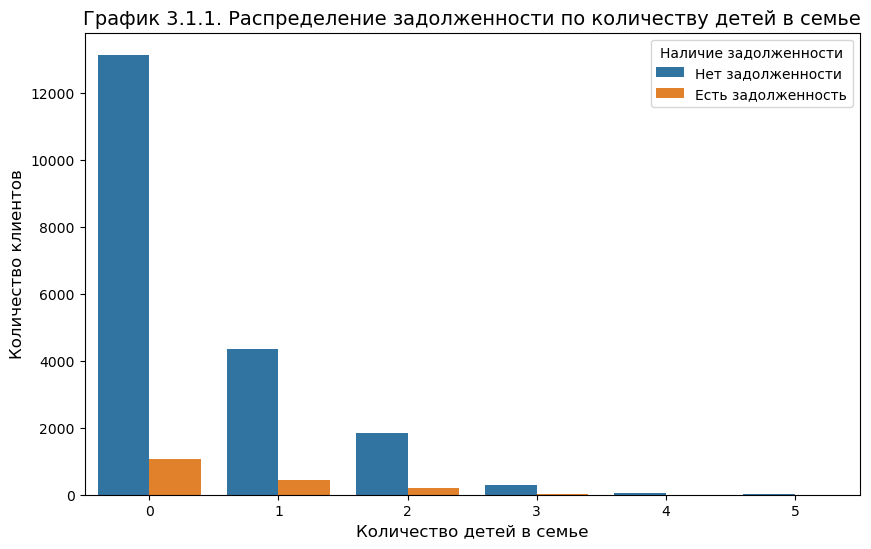

In [38]:
# Построение графика с помощью seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='children', hue='debt')

# Добавление подписей и заголовка
plt.title('График 3.1.1. Распределение задолженности по количеству детей в семье', fontsize=14)
plt.xlabel('Количество детей в семье', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Наличие задолженности', labels=['Нет задолженности', 'Есть задолженность'])

# Показать график
plt.show()

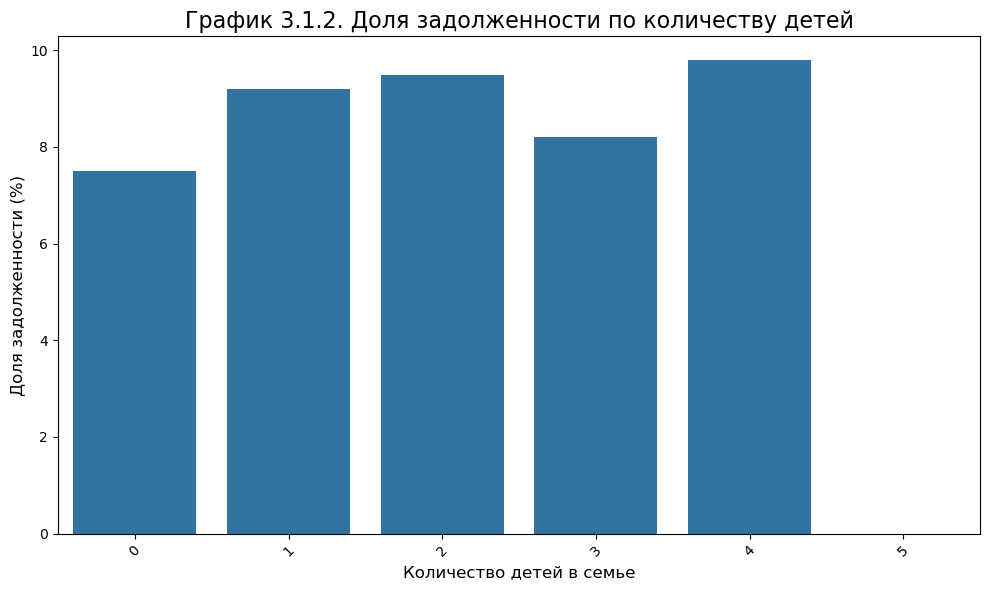

In [39]:
# Построение barplot для доли задолженности по количеству детей
plt.figure(figsize=(10, 6))
sns.barplot(x=children_and_debt.index, y=children_and_debt['Доля с задолженностью %'])

# Настройки графика
plt.title('График 3.1.2. Доля задолженности по количеству детей', fontsize=16)
plt.xlabel('Количество детей в семье', fontsize=12)
plt.ylabel('Доля задолженности (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

<span style="color:green"> **Зависимость между количеством детей и задолженностью:**</span>
* С увеличением количества детей (от 0 до 4) наблюдается незначительное увеличение доли задолженности по кредиту. Однако, несмотря на эту тенденцию, большинство клиентов погашают кредит в срок. Клиенты с более чем 4 детьми крайне редки, что также может повлиять на результаты.

### 3.2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [42]:
# Создание сводной таблицы для анализа зависимости между семейным положением и задолженностью
marital_status_and_debt = df.pivot_table(index='family_status', columns='debt', aggfunc='size')

# Переименование столбцов для наглядности
marital_status_and_debt = marital_status_and_debt.rename(columns={0: 'Нет задолженности', 1: 'Есть задолженность'})

# Добавление столбца с долей задолженности
marital_status_and_debt['Доля задолженности %'] = (marital_status_and_debt['Есть задолженность'] / (marital_status_and_debt['Нет задолженности'] + marital_status_and_debt['Есть задолженность'])).round(3)*100

# Печать сводной таблицы с долей задолженности
marital_status_and_debt

debt,Нет задолженности,Есть задолженность,Доля задолженности %
family_status,,,
Не женат / не замужем,2536,274,9.8
в разводе,1110,85,7.1
вдовец / вдова,896,63,6.6
гражданский брак,3763,388,9.3
женат / замужем,11408,931,7.5


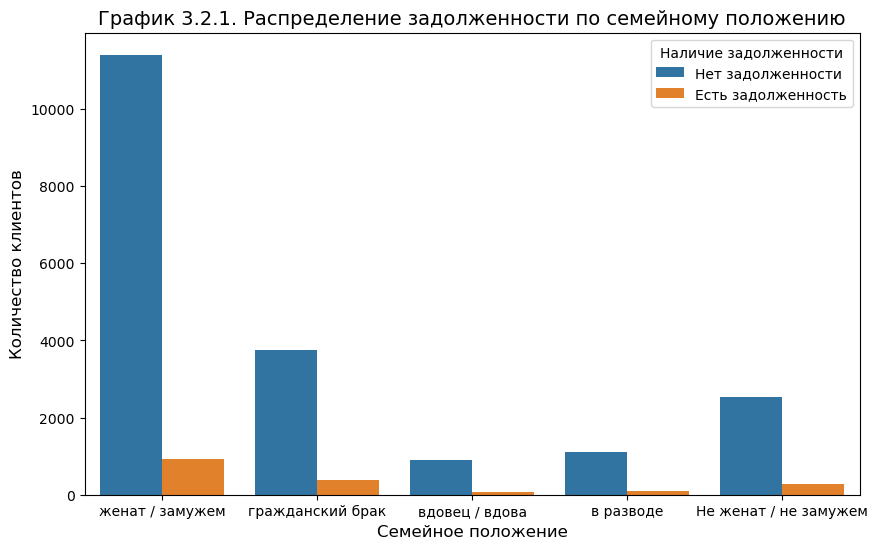

In [43]:
# Построение графика с помощью seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_status', hue='debt')

# Добавление подписей и заголовка
plt.title('График 3.2.1. Распределение задолженности по семейному положению', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Наличие задолженности', labels=['Нет задолженности', 'Есть задолженность'])

# Показать график
plt.show()

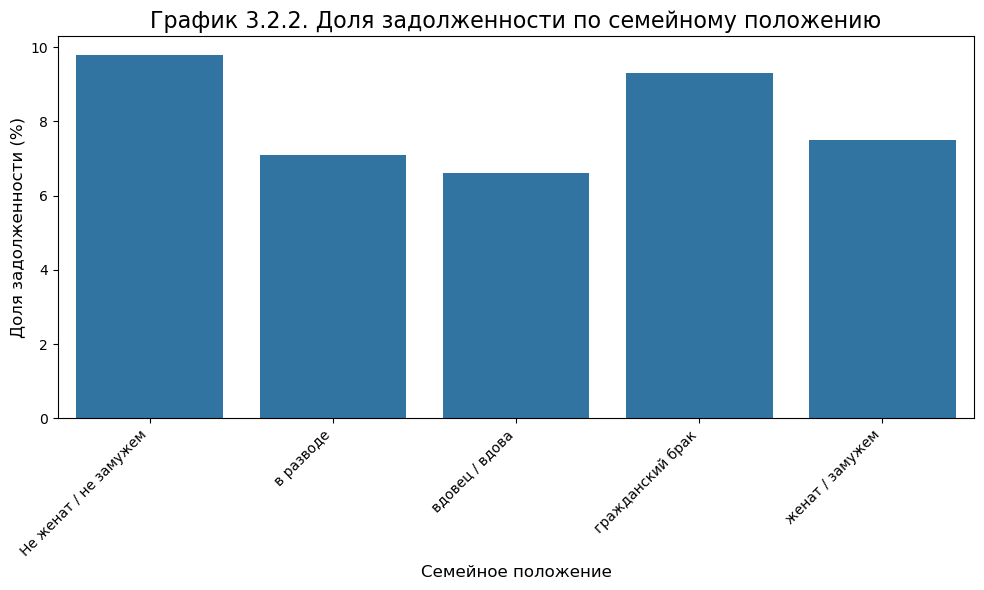

In [44]:
# Построение barplot для доли задолженности
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_and_debt.index, y=marital_status_and_debt['Доля задолженности %'])

# Настройки графика
plt.title('График 3.2.2. Доля задолженности по семейному положению', fontsize=16)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Доля задолженности (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

<span style="color:green"> **Семейное положение и вероятность задолженности:**</span>
* Неженатые/незамужние клиенты имеют наибольшую вероятность задолженности (около 9,8%), что может указывать на большую финансовую нестабильность в этой группе.
* Напротив, женатые/замужние клиенты показывают наименьшую долю задолженности (около 7,5%), что говорит о более высокой финансовой стабильности этой категории.

### 3.3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [47]:
# Создание сводной таблицы для анализа зависимости между уровнем дохода и задолженностью
income_and_debts = df.pivot_table(index='income_category', columns='debt', aggfunc='size')

# Переименование столбцов для наглядности
income_and_debts = income_and_debts.rename(columns={0: 'Нет задолженности', 1: 'Есть задолженность'})

# Добавление столбца с долей задолженности
income_and_debts['Доля задолженности %'] = (income_and_debts['Есть задолженность'] / (income_and_debts['Нет задолженности'] + income_and_debts['Есть задолженность'])).round(3)*100

# Печать сводной таблицы с долей задолженности
income_and_debts

debt,Нет задолженности,Есть задолженность,Доля задолженности %
income_category,,,
Высокий доход,4971,393,7.3
Низкий доход,4937,427,8.0
Средний доход,9805,921,8.6


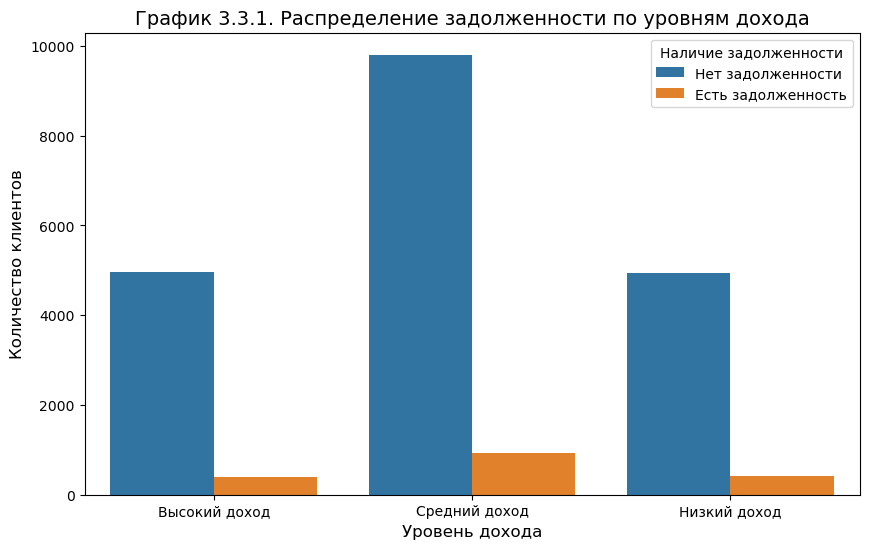

In [48]:
# Построение графика countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_category', hue='debt')

# Добавление подписей и заголовка
plt.title('График 3.3.1. Распределение задолженности по уровням дохода', fontsize=14)
plt.xlabel('Уровень дохода', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Наличие задолженности', labels=['Нет задолженности', 'Есть задолженность'])

# Показать график
plt.show()

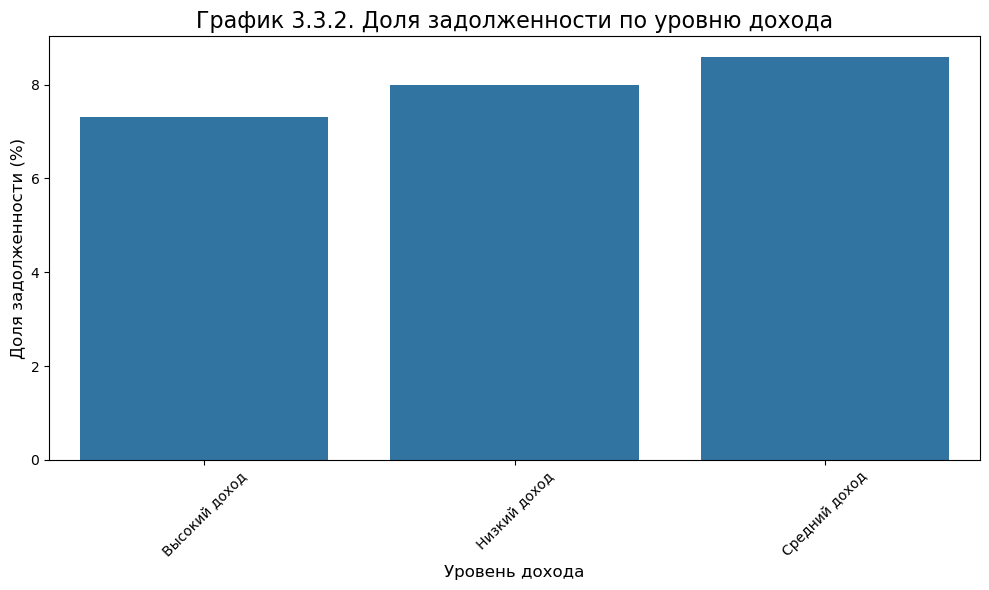

In [49]:
# Построение barplot для доли задолженности по уровню дохода
plt.figure(figsize=(10, 6))
sns.barplot(x=income_and_debts.index, y=income_and_debts['Доля задолженности %'])

# Настройки графика
plt.title('График 3.3.2. Доля задолженности по уровню дохода', fontsize=16)
plt.xlabel('Уровень дохода', fontsize=12)
plt.ylabel('Доля задолженности (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()


<span style="color:green"> **Уровень дохода и его влияние на задолженность:**</span>
* Клиенты с высоким доходом имеют наименьшую долю задолженности (7,3%), что подтверждает идею о большей финансовой стабильности у более обеспеченных людей.
* Клиенты со средним доходом показывают долю задолженности 8,6%, а клиенты с низким доходом — 8%. Хотя доля задолженности у этих групп схожа, для клиентов с низким доходом она несколько ниже.

### 3.4. Как разные цели кредита влияют на его возврат в срок?

In [52]:
# Создание сводной таблицы для анализа зависимости между целью кредита и задолженностью
purpose_and_debts = df.pivot_table(index='categorized_purpose', columns='debt', aggfunc='size')

# Переименование столбцов для наглядности
purpose_and_debts = purpose_and_debts.rename(columns={0: 'Нет задолженности', 1: 'Есть задолженность'})

# Добавление столбца с долей задолженности
purpose_and_debts['Доля задолженности'] = (purpose_and_debts['Есть задолженность'] / (purpose_and_debts['Нет задолженности'] + purpose_and_debts['Есть задолженность'])).round(3)*100

# Печать сводной таблицы с долей задолженности
purpose_and_debts

debt,Нет задолженности,Есть задолженность,Доля задолженности
categorized_purpose,,,
Покупка жилья/квартиры,4152,308,6.9
Покупка недвижимости,5877,474,7.5
Получение образования,3643,370,9.2
Приобретение/ремонт/обмен автомобиля,3903,403,9.4
Проведение свадьбы,2138,186,8.0


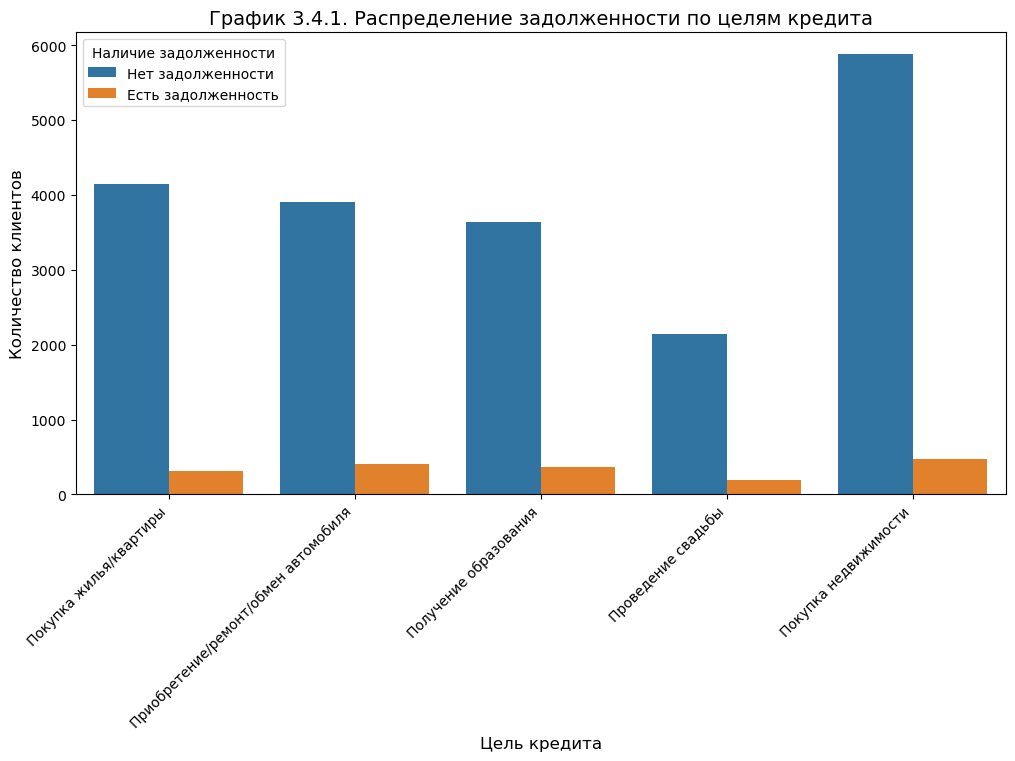

In [53]:
# Построение графика countplot для зависимости между целью кредита и задолженностью
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='categorized_purpose', hue='debt')

# Добавление подписей и заголовка
plt.title('График 3.4.1. Распределение задолженности по целям кредита', fontsize=14)
plt.xlabel('Цель кредита', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Наличие задолженности', labels=['Нет задолженности', 'Есть задолженность'])

# Показать график
plt.show()

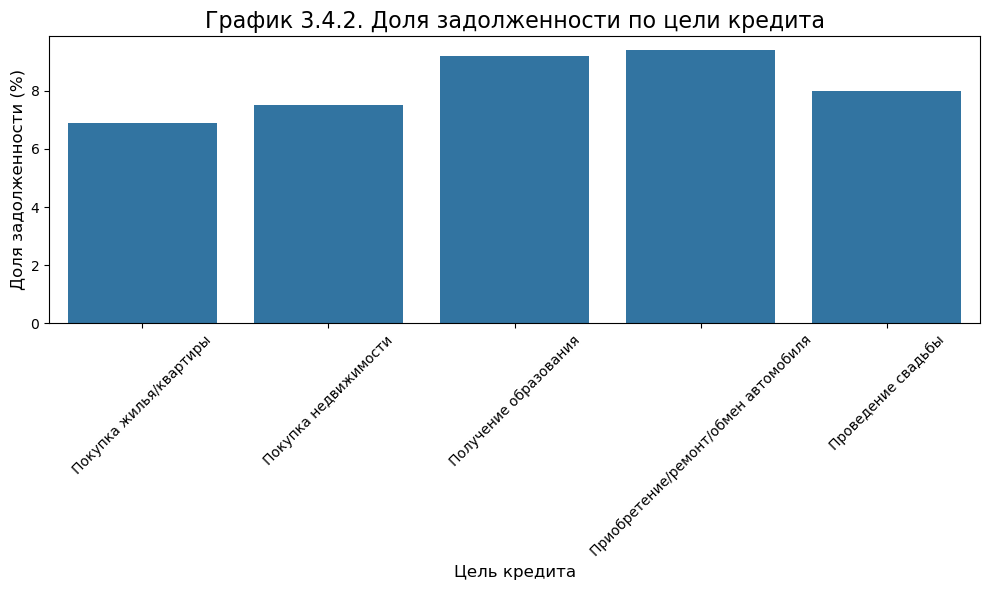

In [54]:
# Построение barplot для доли задолженности по целям кредита
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_and_debts.index, y=purpose_and_debts['Доля задолженности'])

# Настройки графика
plt.title('График 3.4.2. Доля задолженности по цели кредита', fontsize=16)
plt.xlabel('Цель кредита', fontsize=12)
plt.ylabel('Доля задолженности (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

<span style="color:green"> **Цели кредита и их связь с задолженностью:**</span>
* Кредиты на покупку жилья/квартиры имеют наименьшую долю задолженности (6,9%), что может быть связано с высоким уровнем финансовой ответственности клиентов, берущих такие кредиты.
* Кредиты на покупку недвижимости и кредиты на проведение свадьбы имеют умеренную долю задолженности (7–8%), в то время как кредиты на образование и автомобили имеют более высокую вероятность задолженности (9,2% и 9,4%, соответственно).

------------------------------------------------------------------------------------------------------------------------------------

# Шаг 4. Общий вывод (Рекомендации для скоринговой системы)

#### 1. Меньший риск у клиентов с высоким доходом и семейным положением "женат/замужем". Эти категории клиентов демонстрируют наименьшую долю задолженности, и, следовательно, для них можно предлагать более выгодные условия кредитования.
#### 2. Клиенты с целью "Покупка жилья/квартиры" имеют наименьшую долю задолженности, что также свидетельствует о высокой вероятности своевременного погашения кредита. Это может стать важным фактором при оценке рисков.
#### 3. Клиенты с 5 и более детьми требуют особого внимания, поскольку таких клиентов мало, и для них недостаточно данных, что может затруднять прогнозирование.
#### 4. Средний и низкий доход ассоциируются с схожими уровнями задолженности, поэтому для таких клиентов важно дополнительно учитывать другие факторы, такие как стабильность дохода и семейное положение.